In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


linked colab with google drive.

In [5]:
!git clone https://github.com/creatorbeen/AlxD_2021_HYOBIN.git

Cloning into 'AlxD_2021_HYOBIN'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


repository clone from github

In [6]:
import pandas as pd 

# some lines have too many fields (?), so skip bad lines
imgatt = pd.read_csv('/content/AlxD_2021_HYOBIN/CUB_200_2011/image_attribute_labels.txt', sep='\s+', header=None, error_bad_lines=False, 
                     warn_bad_lines=False, usecols=[0,1,2], names=['imgid', 'attid', 'present'])

# description from dataset README:
#
# The set of attribute labels as perceived by MTurkers for each image
# is contained in the file attributes/image_attribute_labels.txt, with
# eaxh line corresponding to one image/attribute/worker triplet:
#
# <image_id> <attribute_id> <is_present> <certainty_id> <time>
#
# where <image_id>, <attribute_id>, <certainty_id> correspond to the IDs
# in images.txt, attributes/attributes.txt, and attributes/certainties.txt
# respectively. <is_present> is 0 or 1 (1 denotes that the attribute is)
# present). <time> denotes the time spent by the MTurker in seconds.


image_attribute_labels.txt라는 dataset을 import.

In [7]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


head() method is used to return top n (5 by default) rows of a data frame or series.
image ID number 1 does not have attributes 1,2,3, or 4, but it does have attribute 5.

In [8]:
imgatt.shape

(3677856, 3)

The shape shows how many rows and columns: (3677856 row, 3 columns)

In [9]:
# need to reorganize imgatt to have one row per lmgid, and 312 columns (one column per attribute),
# with 1/0 in each cell representing if that imgid has that attribute or not

imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

Pivot on the image ID and make one row for each image ID. There will be only one row for image numger one. Turn the attributes into distinct columns, and the values will be ones or twos.

In [10]:
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


each image ID is just one row and each attribute is its own column

In [11]:
imgatt2.shape

(11788, 312)

we have 312 columns and 312 attributes, which is ultimately about 12,000 images or 12,000 diffrent examples of birds

In [12]:
# now we need to load the image true classes

imglabels = pd.read_csv('/content/AlxD_2021_HYOBIN/CUB_200_2011/image_class_labels.txt', sep=' ', header=None, 
                        names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

# description from dataset README:
#
# The ground truth class labels (bird species labels) for each image are contained
# in the file image_class_labels.txt, with each line corresponding to one image:
#
#<image_id> <class_id>
#
# where <image_id> and <class_id> correspond to the IDs in images.txt and classes.txt, respectively.

impor image_class_labels.txt to use dataset

In [13]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


The imgid column has 1,2,3,4, and 5, all are labeled as 1. 

In [14]:
imglabels.shape

(11788, 1)

There are 11788 rows, which is perfect

In [15]:
# now we need to attach the labels to the attribute data set,
# any shuffles; then we'll separate a test set from a training set

df = imgatt2.join(imglabels)
df = df.sample(frac=1)

we want to drop the label from the label

In [16]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

The first 312 columns and the last column being a label.

In [17]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5041,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5494,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1012,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2044,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1106,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


After shuffling, we have the first row as image 5041, the second row as image 5494, and so forth. The attributes in the label data are in agreement.

In [18]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

There were about 11788 rows, so let's take the first 8,000 and call them training, and the call rest of them testing (3788). 

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

We'll get the answers using 'RandomForestClassifier'. 

In [20]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Max features show the number of different columns each tree can look at. For an instance, if we say something like, look at two attributes, that's probably not enough to actually figure out which bird it is. Some birds are unique, so you might need a lot more attributes. Later if we say 'max_feature=50' and the number of estimators denote the number of trees created. The fit actually builds it.

In [21]:
print(clf.predict(df_train_att.head()))

[87 94 19 36 20]


Predict a few cases. Let's attributes from the first five rows of the training set, which will predict species 87, 94, 19, 36, and 20.

In [22]:
clf.score(df_test_att, df_test_label)

0.4535374868004224

After testing, we got 45% accuracy. Even 45% accuracy is not the best result. There are 200 species, so having 0.5% accuracy is much better than randomly guessing.

In [23]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

Let's make a confusion matrix to see which birds the dataset confuses. The 'confusion_matrix' function from scikit-learn will produce the matrix, but it's a pretty big matrix.

In [24]:
cm

array([[ 0,  0,  2, ...,  0,  0,  0],
       [ 0, 13,  0, ...,  0,  1,  0],
       [ 2,  1,  8, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0, 19]])

Two hundred by two hundred is not easy to understand in a numeric form like this.

In [25]:
# from http://scikit-learn.org.stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  #for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  #   plt.text(i, j, format(cm[i,j], fmt), horizontalalignment="center",
  #   color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

some code from the scikit-learn documentation that allows us to plot the matrix and the color in the matrix

In [26]:
birds = pd.read_csv("/content/AlxD_2021_HYOBIN/CUB_200_2011/classes.txt", sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

import classes.txt by pd.read_csv()
We need the actual names of the birds on the matrix so that we know the species that are being confused for each other. There are 200 birds name.

Normalized confusion matrix
[[0.   0.   0.17 ... 0.   0.   0.  ]
 [0.   0.72 0.   ... 0.   0.06 0.  ]
 [0.1  0.05 0.4  ... 0.   0.   0.  ]
 ...
 [0.04 0.   0.   ... 0.08 0.   0.  ]
 [0.   0.   0.   ... 0.   0.8  0.  ]
 [0.   0.   0.   ... 0.   0.   0.76]]


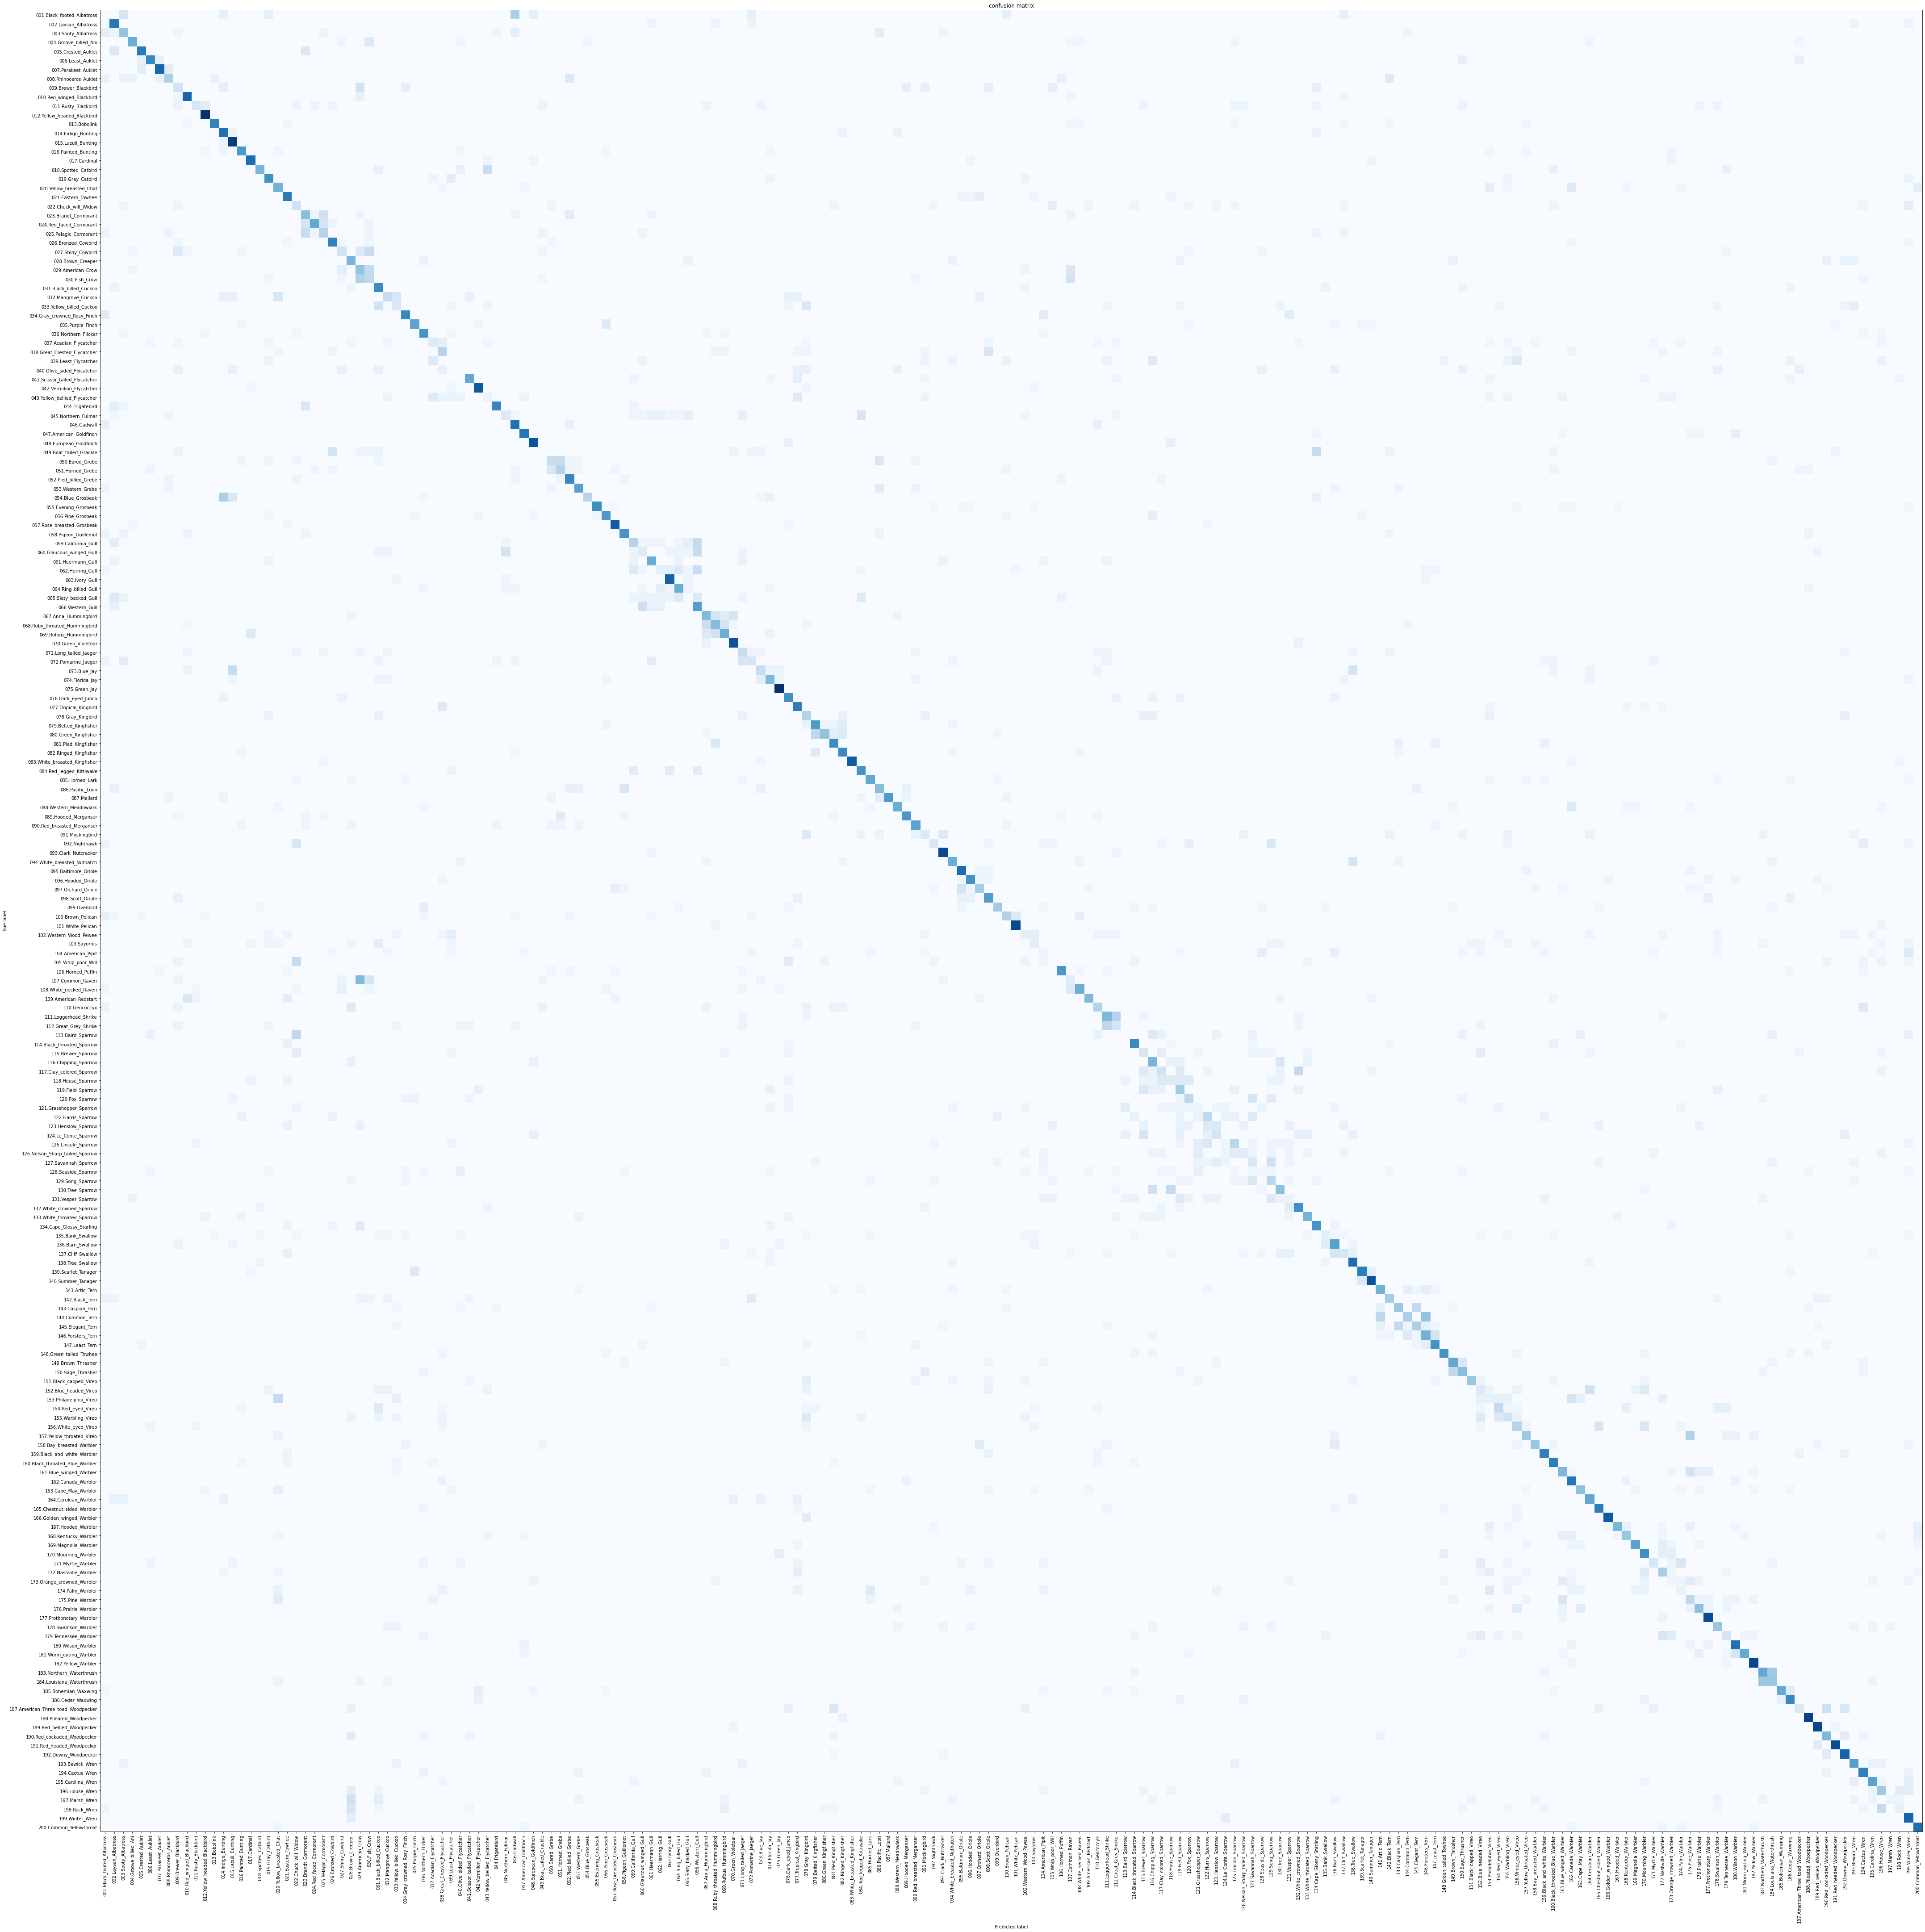

In [27]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=72)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

This is the confusion matrix for this dataset. The output is unreadable because there are 200 rows and columns. But if we click it you want to see, on the y axis you will see the actual birds, and on the x axis, you will see the predicted birds.

For example, the common yellow throat is the true one. Looking at the following graph, we can see that the common yellow throat is confused with the black-footed albatross. When we zoom out, we will see the confusion. It's like a square of confusion that was there between the common yellow throat and the black-footed albatross. Some features are terns, such as the arctic tern, black tern, Caspian tern, and the common tern. Terns are apparently easy to confuse because they look similar.

This is the set regarding sparrows. The confusion matrix tells us the things that we expect, that is, birds that look similar are confused with each other. There are little squares of confusion, as seen in the previous screenshot. For the most part, you don't want to confuse an albatross with a common yellow throat because this means that the dataset doesn't know with what it's doing.

In [28]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.2779831045406547

The accuracy is 28%, which is less than the previous 45% accuracy. Therefore, the decision tree is worse.

In [29]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4770327349524815

use a 'Support Vector Machine (SVM), which is the neural network approach, the output is 48%. 

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.43 (+/- 0.02)


In [31]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.02)


In [32]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.03)


Perform cross-validation to make sure that we split the training test in different ways.
The output is still 43% for the random forest, 26% for our decision tree, and 47% for SVM.

In [33]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts), 4), float)
i = 0
for max_features in max_features_opts:
  for n_estimators in n_estimators_opts:
      clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
      scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
      rf_params[i,0] = max_features
      rf_params[i,1] = n_estimators
      rf_params[i,2] = scores.mean()
      rf_params[i,3] = scores.std() * 2
      i += 1
      print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
            (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.36 (+/- 0.03)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.02)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 130, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 150, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 190, accuracy: 0.44 (+/- 0.03)
Max features: 10, num estimators: 10, accuracy: 0.28 (+/- 0.01)
Max features: 10, num estimators: 30, accuracy: 0.37 (+/- 0.01)
Max features: 10, num estimators: 50, accuracy: 0.40 (+/- 0.01)
Max features: 10, num estimators: 70, accuracy: 0.42 (+/- 0.03)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.02)
Max features: 10, num estimators: 110, accura

This code about how many different questions can each tree ask? How many attributes does it look at, and how many trees are there? There are a lot of parameters to look through, so just make a loop and try them all.
The results are all the accuracies.

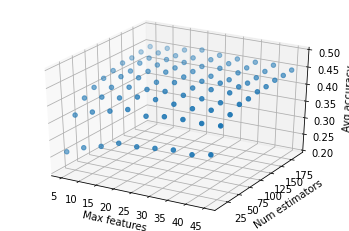

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection = '3d')
x = rf_params[:, 0]
y = rf_params[:, 1]
z = rf_params[:, 2]
ax.scatter(x,y,z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()

We can see that increasing the number of trees produces a better outcome. Also, increasing the number of features produces better outcomes if you are able to see more features, but ultimately, if you're at about 20 to 30 features and you have about 75 to 100 trees, that's about as good as you're going to get an accuracy of 45%.

# 3.2
cv means the number of folds.
default=3, but we use 'cv=5' that means running 5-fold cross validation.
Let's change cv value.
if cv=3, accuracy similar with cv=5, but (+/-) value is pretty lower.
if cv=10, accuracy similar with cv=5, but (+/-) value is pretty higher.

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=3)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.44 (+/- 0.01)


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=10)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.45 (+/- 0.04)


#3.3
The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions.

The kernel functions return the inner product between two points in a suitable feature space. Thus by defining a notion of similarity, with little computational cost even in very high-dimensional spaces.

The results are similar with SVC() accuracy. But better than another accuracy.

In [35]:
from sklearn import svm
clfsvm = svm.SVC(kernel='linear')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.46172122492080253

In [39]:
from sklearn import svm
clfsvm = svm.SVC(kernel='poly')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4355860612460401

In [36]:
from sklearn import svm
clfsvm = svm.SVC(kernel='rbf')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4770327349524815

In [37]:
from sklearn import svm
clfsvm = svm.SVC(kernel='sigmoid')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4625131995776135

#3.4
(1) gamma
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

(2) C
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

(3) The results are similar with SVC() accuracy.


In [42]:
from sklearn import svm
clfsvm = svm.SVC(gamma='auto')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.27983104540654696

In [44]:
from sklearn import svm
clfsvm = svm.SVC(gamma='scale')
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4770327349524815

In [47]:
from sklearn import svm
clfsvm = svm.SVC(C=1.0)
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4770327349524815